In [2]:
!pip install pandas matplotlib numpy seaborn scikit-learn
!pip install scikit-learn


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath, header=None)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,0.0,7129300520,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,1.0,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
3,2.0,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
4,3.0,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000


In [8]:
print(df.dtypes)

0     float64
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9      object
10     object
11     object
12     object
13     object
14     object
15     object
16     object
17     object
18     object
19     object
20     object
21     object
dtype: object


In [9]:
df.describe()

,0
count,21613.00000
mean,10806.00000
std,6239.28002
min,0.00000
25%,5403.00000
50%,10806.00000
75%,16209.00000
max,21612.00000


In [10]:
df.columns = df.iloc[0] 

In [11]:
df = df[1:].reset_index(drop=True)

In [12]:
df.head()

,NaN,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.0,7129300520,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1.0,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
2,2.0,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
3,3.0,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000
4,4.0,1954400510,20150218T000000,510000.0,3.0,2.0,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
df.drop(["id"], axis=1, inplace=True)

In [14]:
df.drop(columns=[col for col in df.columns if pd.isna(col)], inplace=True)

In [15]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
3,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000
4,20150218T000000,510000.0,3.0,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,21613,21600,21603,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613
unique,372,4028,12,29,1038,9782,6,2,5,5,12,946,306,116,70,70,5034,752,777,8689
top,20140623T000000,350000.0,3.0,2.5,1300,5000,1.0,0,0,3,7,1300,0,2014,0,98103,47.5322,-122.29,1540,5000
freq,142,172,9824,5380,138,358,10680,21450,19489,14031,8981,212,13126,559,20699,602,17,116,197,427


In [17]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [22]:
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors="coerce")
df["bathrooms"] = pd.to_numeric(df["bathrooms"], errors="coerce")


In [23]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

C:\Users\Akshat shanu rakesh\AppData\Local\Temp\ipykernel_15320\4091211281.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan,mean, inplace=True)


In [24]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

C:\Users\Akshat shanu rakesh\AppData\Local\Temp\ipykernel_15320\1207139423.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].replace(np.nan,mean, inplace=True)


In [25]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [26]:
floor_counts = df["floors"].value_counts().to_frame(name="house_count")

print(floor_counts)


        house_count
floors             
1.0           10680
2.0            8241
1.5            1910
3.0             613
2.5             161
3.5               8


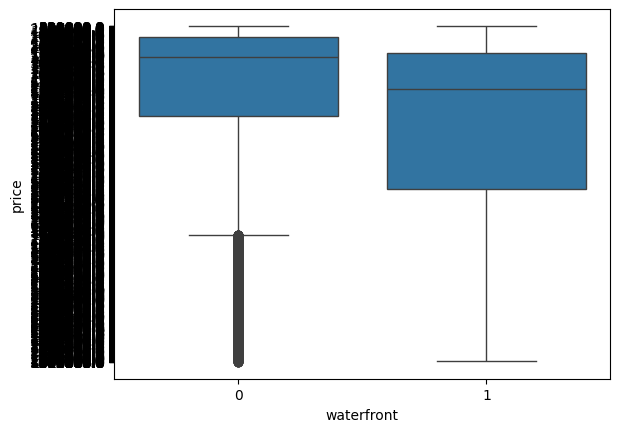

In [28]:

sns.boxplot(x="waterfront", y="price", data=df)
plt.show()

In [29]:
df["sqft_above"] = pd.to_numeric(df["sqft_above"], errors="coerce")
df["price"] = pd.to_numeric(df["price"], errors="coerce")

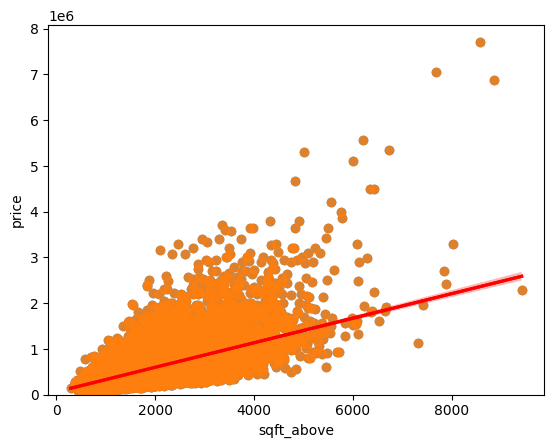

In [32]:
sns.regplot(x="sqft_above", y="price", data=df, line_kws={"color": "red"})
plt.ylim(0,)
plt.show()

In [35]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S', errors='coerce')


In [36]:
df['date'] = df['date'].astype('int64')  


In [37]:
print(df.corr())


0                  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0                                                                               
date           1.000000 -0.004357 -0.016590  -0.034158    -0.034559  0.006313   
price         -0.004357  1.000000  0.308797   0.525738     0.702035  0.089661   
bedrooms      -0.016590  0.308797  1.000000   0.514194     0.578077  0.032307   
bathrooms     -0.034158  0.525738  0.514194   1.000000     0.755371  0.087929   
sqft_living   -0.034559  0.702035  0.578077   0.755371     1.000000  0.172826   
sqft_lot       0.006313  0.089661  0.032307   0.087929     0.172826  1.000000   
floors        -0.022491  0.256794  0.178022   0.502132     0.353949 -0.005201   
waterfront     0.001356  0.266369 -0.006800   0.063744     0.103818  0.021604   
view          -0.001800  0.397293  0.080058   0.188341     0.284611  0.074710   
condition     -0.050769  0.036362  0.026690  -0.126197    -0.058753 -0.008958   
grade         -0.039912  0.6

In [38]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [39]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.4928532179037931

In [40]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

In [41]:
Z = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"] ]    
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.6576951666037504


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

In [45]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.7513408515988734


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [47]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [48]:
from sklearn.linear_model import Ridge

In [49]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6478759163939114


In [50]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7002744264849261
